# MuMoT User Manual <a class="tocSkip">

## Multiscale Modelling Tool  <a class="tocSkip">

This is the user manual for [MuMoT](https://mumot.readthedocs.io/) (Marshall *et al.*, [2019](#references)), a software tool developed at the University of Sheffield as part of the [DiODe](http://diode.group.shef.ac.uk) project.

### Working with MuMoT

MuMoT runs inside [Jupyter notebooks](http://jupyter.org) - since you are reading this User Manual you have presumably already installed Jupyter, or are using an installation provided to you. To toggle the [table of contents](https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tree/master/src/jupyter_contrib_nbextensions/nbextensions/toc2) click the 'Table of Contents' button in the Jupyter toolbar.

Next, you need to install MuMoT itself; MuMoT is a Python package  - see the [project documentation](https://mumot.readthedocs.io/en/latest/getting_started.html) for detailed installation instructions.

To run commands in 'Code' cells it's usually easiest just to hit `Shift + Enter`; here is some basic information on [working with Jupyter notebooks](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html). You can also use [Markdown](https://en.wikipedia.org/wiki/Markdown) cells (like this one) to write descriptive text, using simple [formatting](https://www.markdownguide.org/cheat-sheet) and even LaTeX [maths](https://en.wikibooks.org/wiki/LaTeX/Mathematics). Double-click in a Markdown cell to see how it is coded; hit `Shift + Enter` to return to the reader's-eye view of it. There are other kinds of cell too; to change the current cell's type click on the drop-down widget in the Jupyter toolbar.

With Jupyter and MuMoT both installed, you simply need to import the MuMoT package into your notebook using `import mumot`.

In [1]:
import mumot

mumot.about()

Created `%%model` as an alias for `%%latex`.
Multiscale Modelling Tool (MuMoT): Version 1.2.3.dev6+gcb273be
Authors: James A. R. Marshall, Andreagiovanni Reina, Thomas Bose
Contributors: Robert Dennison, Will Furnass
Documentation: https://mumot.readthedocs.io/


### Defining your first model

If everything went well with importing MuMoT you should have seen the message

``Created `%%model` as an alias for `%%latex``

followed by information on the current version, and documentation, from the `about()` command.

MuMoT models are defined using the `%%model` keyword within a cell, and have a very simple syntax; since MuMoT works with *chemical kinetic* or *reaction kinetic* models, you simply have to describe the reactions that take place, and the rates with which they occur. For example

`A + A -> A + U: s`

is a very simple reaction, in which two particles of type $A$ interact, and one changes to type $U$, at rate $s$.

These kind of reaction rules are quite general; they describe a lot of chemical reactions, as well as collective behaviour in which individuals interact to change each other's state, and even demographic models in which individuals are born and die.

Our first model will be based on signalling behaviour observed in honeybee swarms, as described and modelled in Seeley *et al.* ([2012](#references)) and Pais *et al.* ([2013](#references)).


The `$` at the start and end just allow us to use [LaTeX](https://en.wikipedia.org/wiki/LaTeX) codes for our state and rate labels, allowing us to use  letters from different alphabets, such as Greek, and other nice formatting - if you don't know LaTeX don't worry about this - leave in the `$` signs, they won't hurt.

OK, here we go...

In [2]:
%%model
$
U -> A : g_A
U -> B : g_B
A -> U : a_A
B -> U : a_B
A + U -> A + A : r_A
B + U -> B + B : r_B
A + B -> A + U : s
A + B -> B + U : s
$

<IPython.core.display.Latex object>

Now we have our model, and Jupyter should have reprinted the rules underneath the cell you input them in.

You can see that actually the `_` code enables you to use subscripts, which can be handy for distinguishing related rates - in this model there are two distinct nest sites for the honeybee swarm to choose between, *A* and *B*, and rates associated with each one.

We have our model, but currently it is not useful; it's only a definition, not a fully-fledged model that we can start analysing with MuMoT. To make one of those we have to use the `parseModel` command; we simply pass in a reference to the cell where we defined our model - this should be in input cell 2...

In [5]:
model1 = mumot.parseModel(In[2])

If there is no output from `parseModel` that is good news - it means the model was valid. Now we have an object, which we called `model1`, which is a version of the model that we can start doing useful work with. For example, we can see its 'reactants' (or states, or types of individual; remember the terminology comes from chemical reactions)...

In [4]:
model1.showReactants()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

...and the rates the reactions happen at...

In [6]:
model1.showRates()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Note that here MuMoT also helpfully tells us which reactions in the original model definition each rate is associated with.

We can also look at the reaction equations in a slightly nicer format...

In [7]:
model1.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can even see a simple figure representing our model...

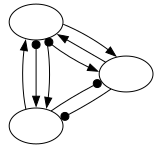

In [8]:
model1.visualise()

This figure attempts to represent the nature of the interactions between reactants graphically, from simple transitions (arrows), inhibitions (filled circles) and induced switches (arrows with filled circles at the origin); to understand the different interaction patterns try relating the arrows with the reactions we defined above, by reference to the rates they are labelled with.

### Exploring your new model

If you want to know what commands you can send to an object, Jupyter lets you type out the object name, then a `.`, then hit `Tab` to see a list of accepted commands. You can also consult the [Command reference](#comreference) for a full list of model commands, and details on their use.

One commmand that looks intruiguing is `showODEs()`

In [9]:
model1.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This is where things start getting interesting, because equations are what mathematicians analyse. `showODEs` shows the model's Ordinary Differential Equations, which describe how the populations of reactants in the model change over time. MuMoT has derived these equations for you automatically, from your description of the reactions. If you are familiar with ODEs then you should be able to read these quite easily. However even if you are not, you can still work with them. By the way, if you right click on the equations you can get the source code to generate them in a number of different formats, should you want to insert them into a paper or report.

So, what analysis can we do in MuMoT now we've found our ODEs?

Well, we might want to look at how the state of the system (the proportions of the different reactants) change on average over time...

...but before we do that, we let MuMoT know that this is actually a simpler set of equations than it appears to be. $A$, $B$, and $U$ represent states that honebees can be in during the swarming process, either committed to site *A*, committed to site *B*, or *U*ncommitted. Because there is a constant number of individuals in the swarm during a decision, one of these equations is redundant; the change in the uncommitted bee frequency can be worked out from the change in frequencies of $A$-committed and $B$-committed bees, for example.

We let MuMoT know this by defining one of the reactants in terms of the other, using `substitute()`

In [10]:
model2 = model1.substitute('U = N - A - B')

Now we have a simplified model, `model2`, which only has two equations, because we have told MuMoT that the total number of uncommitted bees $U$ is the total number of bees in the swarm $N$, minus the numbers committed to the two different nests ($A$ and $B$)

In [11]:
model2.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Having a closer look at these equations, we see that $U$ has vanished from the equations. 

If you want to find out why the ODEs look the way they do, how they were derived, and where the funny symbols come from, keep reading. If not, skip forward a couple of cells to where we generate out first interactive graphical *view* on the model.

Let's inspect the ODEs of `model2` (and those of `model1` shown a bit further up) even closer. The symbols denoting *reactants* in the ODEs are *concentrations*, as their derivation is based on the *law of mass action*: the rate with which a chemical reaction occurrs is proportional to (the product of) the concentration of the reactants. This can be made clearer by deriving the ODEs via a principled method based on the system size expansion (also called *van Kampen* expansion ([van Kampen, 2007](#references)) of the *Master equation*, as explained in the [relevant section](#masterEqFokkerPlanck) below. In MuMoT we can use `showODEs()` with the keyword `method='vanKampen'` - here is an example: 

In [12]:
model2.showODEs(method='vanKampen')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

As you can see, we use the upper-case Greek letter $\Phi$ to denote concentrations (proportions) and the reactants are added as indices. This is done throughout MuMoT and you will encounter this notation again when you work your way through this notebook. Hence, upper-case $\Phi$ cannot be used as a user-defined symbol in MuMoT to avoid confusion.   

If the keyword `method='vanKampen'` is not provided in `showODEs()`, a heuristic default method is applied accessible with the keyword `method='massAction'`. As `method='massAction'` is used as default automatically, it does not need to be given as a *keyword* in the `showODEs` command. Using the default method is faster than deriving the ODEs via *van Kampen* expansion. To discriminate between both methods we use the two different notation styles. However, both methods yield equations which describe how the system evolves over time on average.

This shall be enough about mathematical equations for now; let's turn to more exciting graphical output and numerically *integrate* the ODEs using the MuMoT-method `integrate()`

FloatSlider(value=2.0, continuous_update=False, description='\\(a_{A}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(a_{B}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(g_{A}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(g_{B}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(r_{A}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(r_{B}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(s\\)', max=20.0, readout_format='.1f', style=S…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(FloatSlider(value=1.0, continuous_update=False, description='$\\Phi_{A}$ at …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


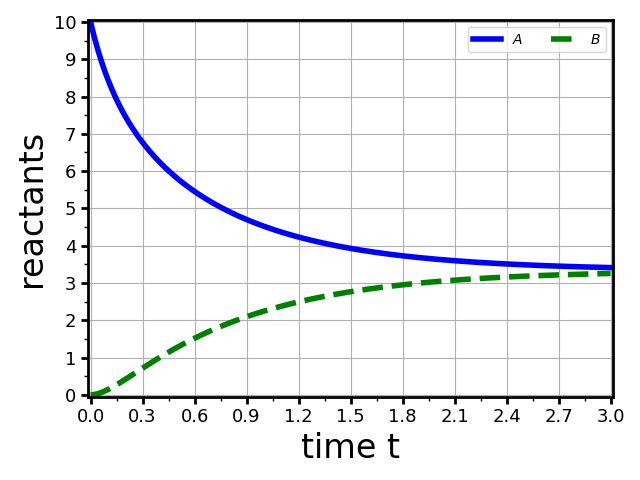

In [13]:
int1 = model2.integrate()

Above you should see an interactive plot of how the reactant populations change over time.
There are various ways to manipulate this graph. You will notice that there are some sliders above the figure; MuMoT gives you a slider for every rate in the model, and by changing their values, you can see what happens to the behaviour of the system. There is also an `Advanced options` tab which unfolds if you click on it. You can choose the initial conditions (note those are given as proportions labelled $\Phi_{<Reactant>}$), the simulation time and whether you want to plot *absolute numbers* (labelled with the reactants' symbols as given in the original model definition) or *proportions* (labelled $\Phi_{<Reactant>}$). In this example, the initial conditions you can choose on the sliders sum to 1 automatically; recall that this is because the system is *conserved* (i.e. the total number of bees is a constant). MuMoT recognises this, as one of the original reactants (representing uncommitted bees $U$) was substituted using `substitute()`. There are many more plotting options available which are all explained in the section [Keyword arguments](#sec:kwargs).  

Jupyter also lets you interact nicely with the figure; you can zoom in, back out, pan around, and save, all by clicking the icons that appear underneath it. If you want to save a figure for a paper, simply click the disk icon. And if while exploring the model you find a nice figure, you can click the *off icon* in its top right to snapshot it, and generate a new interactive figure to play with (if you start running out of space for your plots, click in the left margin to toggle scrolling). You can then simply right-click your snapshots to save them from your browser - just don't forget to note the parameters that generated them - you can find that out by looking at the logs... later in the manual we will see how to take notes properly to reproduce analyses (see [Bookmarking](#bookmarking)).

Every *controller* in MuMoT keeps a log of everything it's been asked to do; we called our controller `int1` when we created it, so it is easy to check what it has been up to... (WARNING: if you have been playing with the sliders a lot, there could be a lot in the logs! To only see the last few entries we set the `tail` argument to `True`; if `tail` is not set it will be assumed to be `False`).

In [14]:
int1.showLogs(tail = True)

Showing last 3 of 3 log entries:
Starting numerical integration of ODE system with parameters (a_{A}=2.0), (a_{B}=2.0), (g_{A}=2.0), (g_{B}=2.0), (r_{A}=2.0), (r_{B}=2.0), (s=2.0), (initA=1.0), (initB=0.0), (initU=0.0), (maxTime=3.0), (substitutedReactant=U), (conserved=True), at 2024-10-10 18:14:24.118389
Last point on curve:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Another possibility to look at how the model behaves is by asking for a *vector plot* of the two reactants $A$ and $B$ ...

FloatSlider(value=2.0, continuous_update=False, description='\\(a_{A}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(a_{B}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(g_{A}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(g_{B}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(r_{A}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(r_{B}\\)', max=20.0, readout_format='.1f', sty…

FloatSlider(value=2.0, continuous_update=False, description='\\(s\\)', max=20.0, readout_format='.1f', style=S…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(IntSlider(value=20, continuous_update=False, description='Number of runs:', …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


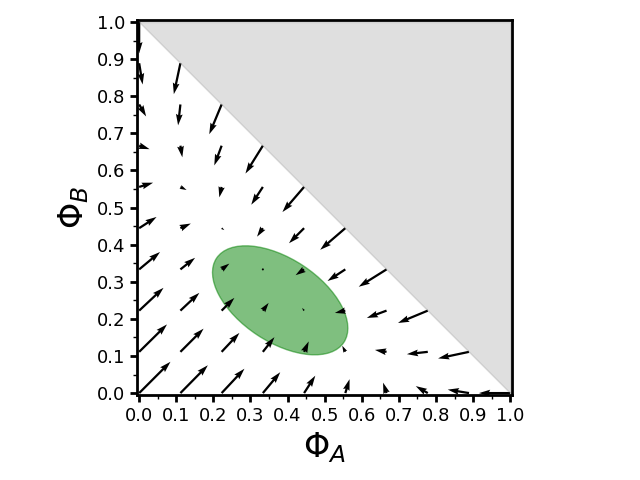

In [15]:
vector1 = model2.vector('A', 'B', showNoise = True)

The figure you see is a vector plot, which shows on average how the state of the system (proportions of bees in states $A$ and $B$ denoted $\Phi_{A}$ and $\Phi_{B}$ following our convention introduced above) will change over time, from any point in the *state space*. The arrows give the direction the system will move in, and their lengths show how fast. Because the total number of bees is constant, so $A+B$ can never exceed 1, the top right hand triangle of the figure is greyed out; these are impossible states. The number of uncommitted bees $U$, which we hid away earlier, is not shown, but it is simply $1-A-B$. But what we really care about in a decision-making process is how the number of 'voters' for the competing options changes over time.

Again, model parameters may be altered via the sliders above the figure and useful information about the computation can be obtained using:

In [16]:
vector1.showLogs(tail = True)

Showing last 3 of 3 log entries:
Starting 2d vector plot with parameters (a_{A}=2.0), (a_{B}=2.0), (g_{A}=2.0), (g_{B}=2.0), (r_{A}=2.0), (r_{B}=2.0), (s=2.0), (aggregateResults=True), (maxTime=2.0), (randomSeed=1740356309), (runs=20), at 2024-10-10 18:14:33.194369
Fixed point1:  A = -1.0000, B = -1.0000,  with eigenvalues:  4.0000, 8.0000,  and eigenvectors:  [-1.0000, 1.0000] and [1.0000, 1.0000]
Fixed point2:  A = 0.3333, B = 0.3333,  with eigenvalues:  -8.0000, -1.3333,  and eigenvectors:  [1.0000, 1.0000] and [-1.0000, 1.0000]


For papers and presentations we can produce somewhat prettier plots similar to figure 1 above, using `stream()`. But before we do that, one unfortunate thing about our `vector1` controller is that there are just too many sliders. We might choose to describe some of the rates (*a*bandonment, *r*ecruitment (via the waggle dance), and individual discovery and commitment (*g*)) in terms of the *v*alues of the nest sites... we can do this by using `substitute()` again:

In [17]:
model3 = model2.substitute('a_A = 1/v_A, a_B = 1/v_B, g_A = v_A, g_B = v_B, r_A = v_A, r_B = v_B')

Our new model is a little simpler, with just three rates, $v_A$, $v_B$ and $s$.

In [18]:
model3.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Still, in decision-making what we really care about is how good options are on average, and their difference in value. Pais *et al.* ([2013](#references)) thus defined option values in terms of deviation from the average value, so
$$\displaystyle v_A=\mu+\frac{\Delta}{2}$$
and
$$\displaystyle v_B=\mu-\frac{\Delta}{2}$$

In [19]:
model4 = model3.substitute('v_A = \mu + \Delta/2, v_B = \mu - \Delta/2')
model4.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This model is much easier to interact with...

FloatSlider(value=2.0, continuous_update=False, description='\\(\\Delta\\)', max=20.0, readout_format='.1f', s…

FloatSlider(value=2.0, continuous_update=False, description='\\(\\mu\\)', max=20.0, readout_format='.1f', styl…

FloatSlider(value=2.0, continuous_update=False, description='\\(s\\)', max=20.0, readout_format='.1f', style=S…

Accordion(children=(Box(children=(IntSlider(value=20, continuous_update=False, description='Number of runs:', …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


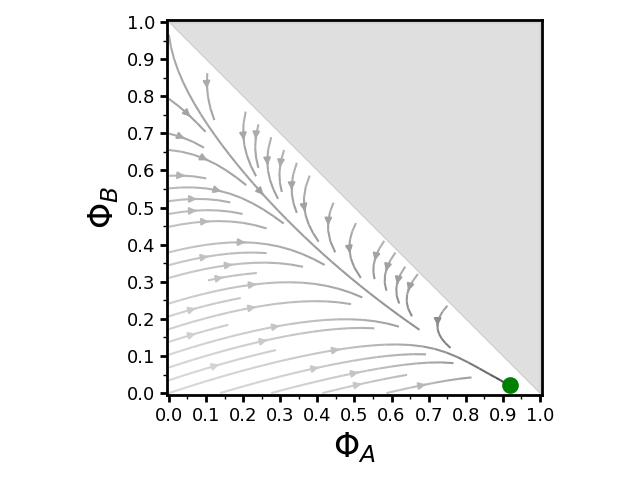

In [20]:
stream1 = model4.stream('A','B', showFixedPoints = True, initWidgets={'mu':[3, 1, 5, 0.5]})

A `stream` plot is just like a `vector` plot, except now lines show the average change of the system over time in more detail, and their shading represents the speed of change, from slow (light grey) to fast (black).

Note also that here we added a *keyword argument* `showFixedPoints = True` - this can also be applied to `vector` plots, and plots the stationary points of the equation. If the stationary point is *stable* (arrows converge on that point) then it is represented with a filled circle, and if it is *unstable* (arrows leave that point) then a hollow circle is shown. Displaying *fixed points* can slow down plots, so by default they are not shown, and you need to explicitly request they are included. To know if a calculation is still running, the *bookmark* button changes colour. It is *pink* during a computation and *grey* otherwise (maybe you have noticed this already in the plots above). 

Analysis of fixed points is an important technique for understanding *dynamical systems* such as our model. But while exploring a model interactively by changing its parameters and seeing how it behaves can help develop intuition, really we need a more systematic approach. Fortunately we can do this via *bifurcation plots*, using the `bifurcation()` command...

`bifurcation()` takes two primary arguments, the first is the parameter we want to vary systematically, the second is the state we want to observe.    

FloatSlider(value=2.0, continuous_update=False, description='\\(\\Delta\\)', max=20.0, readout_format='.1f', s…

FloatSlider(value=2.0, continuous_update=False, description='\\(\\mu\\)', max=20.0, readout_format='.1f', styl…

Accordion(children=(Box(children=(FloatSlider(value=4.5, continuous_update=False, description='Initial \\(s\\)…

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


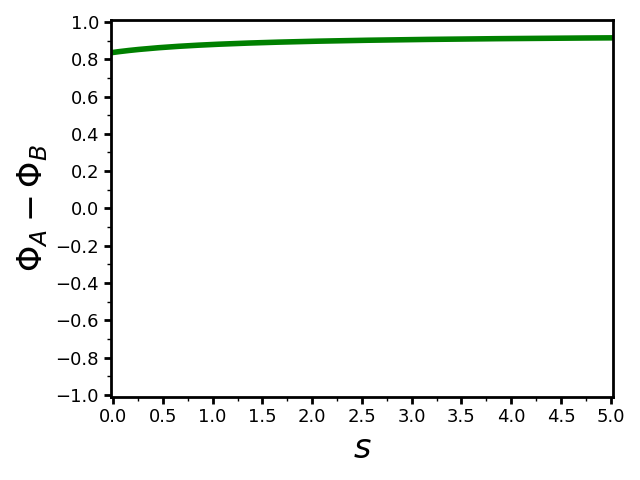

In [21]:
bifurcation1 = model4.bifurcation('s','A-B', 
                                  initWidgets={'mu':[3, 1, 5, 0.5], 'Delta':[0, 0, 2, 0.1], 
                                               'initBifParam':[4.5, 4, 6, 0.1]},
                                 choose_xrange=[0, 5])

Our new bifurcation plot lets us see what happens to fixed points in the system as we vary a control parameter, in this case the cross-inhibitory stop-signalling rate between bees, $s$. We have also chosen not to observe a single reactant as our state variable, but rather the difference between two of them; this makes sense because in decision-making we care about the difference in votes for options.

Note that in the `bifurcation()` command above we specified initial parameter values (and ranges) for the sliders (via `initWidgets={...}`) and the range shown on the x-axis (with `choose_xrange=[xmin, xmax]`), which yields appropriate results straight away. This was necessary because bifurcation methods are very sensitive to even tiny numerical inaccuracies; nice plots are therefore not guaranteed and typically some parameter configurations work better than others. 

Our plot shows the location of fixed points as the *bifurcation parameter* is varied, and they are either depicted as stable (solid line) or unstable (dashed line). Where the stability of fixed points changes, or fixed points appear or dissappear, these are referred to as *bifurcation points*. The label *BP1* means there is one occurrence of a *branch point*. This type of bifurcation is referred to as a *pitchfork bifurcation*. As a next step, move the $\Delta$-slider to 0.1 and observe an *unfolding* of the *pitchfork bifurcation* where the branches become disconnected and instead of a *branch point* a *limit point* (*LP1*) is now detected (this computation may take some time). Now it's your turn. Using the interactive `bifurcation` plot above see if you can reproduce the bifurcation diagrams shown in figure 5(i) and 5(ii) of Pais *et al.* ([2013](#references)).

Figure 5(iii) of Pais *et al.* ([2013](#references)) requires us to specify a different bifurcation parameter...

FloatSlider(value=2.0, continuous_update=False, description='\\(\\mu\\)', max=20.0, readout_format='.1f', styl…

FloatSlider(value=5.0, continuous_update=False, description='\\(s\\)', max=6.0, min=4.0, readout_format='.1f',…

Accordion(children=(Box(children=(FloatSlider(value=2.0, continuous_update=False, description='Initial \\(\\De…

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


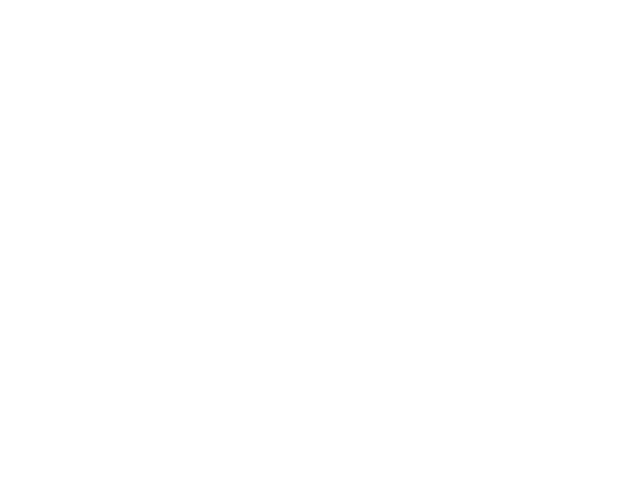

In [22]:
bifurcation2 = model4.bifurcation('\\Delta','A-B', 
                                  initWidgets={'mu':[3, 1, 5, 0.5], 's':[5, 4, 6, 0.5]},
                                  choose_xrange=[-1,1])

More information about what `bifurcation()` currently can (and cannot) do is given in the relevant [Advanced options](#advancedbif) section.

### The effects of finite system size

The ODE models we have been looking at based on our model are very useful, but they represent an idealised scenario; they describe the behaviour of a system with infinitely many components or, to put it another way, the *expected* or *mean field* behaviour of the system, excluding noise.

Noise is very important in collective behavour systems, however, and can have a variety of causes. The first cause we will consider is noisy fluctuations from the infinite population ideal, caused by having a finite, much smaller, population. To begin analysing the noise in our system, dependent on its size, we can deploy two main techniques; stochastic simulation, and statistical physics analysis.

We will return to stochastic simulation later, concentrating first on statistical physics analysis. As you might imagine, the maths involved in a statistic physics analysis is very advanced, based on deriving and then analysing the *Master equation*... it was already mentioned above in discussing how the model's ODEs were derived; fortunately MuMoT automates this analysis for you.

Brace yourself, this might look intimidating...

In [ ]:
model1.showMasterEquation()

You really don't need to understand the equation above, but it's nice to know that MuMoT generated it for you, isn't it? The Master equation describes the probabilities of different transitions between system states. We are particularly interested in it because we can use it to derive the infinite-population behaviour of the system (the ODEs we already saw), but also the noise around that. This is done by applying a technique called the *van Kampen expansion* ([van Kampen, 2007](#references)), to approximate the *Fokker-Planck equation*. In the *Advanced users* section at the end of this manual you'll be able to look at these equations, if you dare, to convince yourself that MuMoT is doing some clever stuff for you

But what is this clever stuff useful for? Well, for one thing, it lets us see approximately what the effects of noise, caused by finite system size, are in terms of deviations from the fixed points of the system...

In [ ]:
stream2 = model4.stream('A','B', showFixedPoints = True, showNoise = True)

This new `stream` plot now lets us see how the system's *expected state* at *equilibrium* gets 'spread out' around the fixed points. Slide the system size slider to see how the extent of the spread depends on the number of components in the system; slide the other sliders to see how the shape of the noise changes, in a way we might not have guessed, as the parameters change.

The effects of noise in the `stream` plot above are based on the computational approximations of the Master equation. When the system has fewer than one or two reactants the noise effects can be approximated mathematically from the Master equation itself; otherwise the computational approximation is achieved through the efficient and accurate *Stochastic Simulation Algorithm* (SSA) (or *Doob-Gillespie algorithm*) [(Gillespie, 1976)](#references). MuMoT also gives you direct access to the SSA simulator to simply visualise the behaviour of the system over time.

To run the SSA simulations on your model, you can use the command `SSA()`. This command allows you to perform a single simulation run; you can specify several advanced parameters from the *Advanced options* tab, as described in the relevant [Advanced options](#advoptionsSSA) section.
Try modifying the parameters and see how they change your results.

In [ ]:
ssa1 = model4.SSA(initWidgets={'initialState': {'U': [1,0,1,0.05], 'B': [0,0,1,0.05], 'A': [0,0,1,0.05]},
                              'systemSize':[50,5,100,1] })

### Spatial noise

MuMoT also enables more sophisticated stochastic simulations of your models. The `multiagent()` command allows you to run simulations either with static agents interacting over a static communication network, or mobile agents communicating to neighbours within a local range of communication.

Each agent represents a reactant, and exchanges messages to interact with other agents and change its internal state  according to a *probabilistic finite state machine*. The conversion of transition rates into probabilities is done following the methodology proposed in Reina *et al.* ([2005](#references)).

The multiagent simulations have several advanced options, as described in the relevant [Advanced options](#advoptionsmulti) section. Try modifying the parameters to see how they change your results.

In [ ]:
multiagent1 = model4.multiagent(initWidgets={'initialState': {'U': [1,0,1,0.05], 'B': [0,0,1,0.05], 'A': [0,0,1,0.05]},
                              'systemSize':[20,5,100,1], 'visualisationType':'graph' })

### Going to a higher dimension
Our first model ended up being 2-dimensional, after we realised that there were a constant number of components in the system. However MuMoT can work with higher-dimensional models (although not all features are supported for them; see [Supported features](#features))

For example, we can consider the generalisation of `model1` above to 3 or more alternatives, as presented by Reina *et al.* ([2017](#references))...

(note here that we will use a relative reference to the last active cell, to avoid problems if we add or remove cells to the notebook; due to the peculiarities of Python the last cell has reference `-2`)

In [ ]:
%%model
$
U -> A : k * v_A
U -> B : k * v_B
U -> C : k * v_B
A -> U : k * (1 / v_A)
B -> U : k * (1 / v_B)
C -> U : k * (1 / v_C)
A + U -> A + A : h * v_A
B + U -> B + B : h * v_B
C + U -> C + C : h * v_C
A + B -> A + U : h * v_A
A + B -> B + U : h * v_B
A + C -> A + U : h * v_A
A + C -> C + U : h * v_C
B + C -> B + U : h * v_B
B + C -> C + U : h * v_C
$

In [ ]:
model5 = mumot.parseModel(In[-2]).substitute('U = N - A - B - C')
vector2 = model5.vector('A', 'B', 'C')

### Non-constant system size
Not all models are of the kind studied above, in which there are a constant number of components. In *open systems* components can be created and destroyed, so the total size of the system can fluctuate over time, and in principle has no limits.

A classic model from both ecology and chemistry is the *Lotka-Volterra* model; ecologists often think of this as representing two interacting populations, one of predators, and one of prey. Individuals are born and die in both populations. MuMoT enables this both via the `\emptyset` notation $\emptyset$, in which components spontaneously arise from nothing, or are destroyed, and via steady-state reactant populations, denoted with `()`, which do not change over time but simply persist at a constant size.

Our Lotka-Volterra example is taken from Murray ([2002](#references), p124). Individuals are born into the prey population $X$ at a rate that depends on that population size, then predatory interactions decrease the prey population size and increase the predator population size. Finally, predators experience background mortality.

In [ ]:
%%model
$
(A) + X -> X + X : \alpha
X + Y -> Y + Y : \beta
Y -> \emptyset : \gamma
$

In [ ]:
model6 = mumot.parseModel(In[-2])
model6.show()

In [ ]:
model6.showODEs()

Note that there is no equation for $A$; since it is specified to be at a constant concentration, it does not change over time. This means that when we try and interact with the model, we will need to specify the constant value that $A$ should take.

Also, since the system size is now no longer constant, as discussed above, it is useful to be able to change the limits on the plot, to ensure that all the interesting behaviour of the system is visible... the `Plot limits` widget enables this.

In [ ]:
stream3 = model6.stream('X','Y', showFixedPoints = False)

<a id='bookmarking'></a>
### Bookmarking

If you find an interesting parameter set and want to preserve it, you can store those parameter values in a form that lets you reproduce your analysis. Simply click on the bookmark button underneath the sliders; you should see a message that a bookmark has been pasted to the logs, and instructions how to view it. Let's follow these instructions from our latest plot... click the bookmark button on the last plot, then run the following command:

In [ ]:
stream3.showLogs(tail = True)

Now we need simply copy the last line of the log file, paste into a new cell, and replace `<modelName>` with the model we are working with, in this case `model5`; this is easily done by clicking in the cell then using *Find and Replace* from the *Edit* menu. We will also give our new bookmarked view a unique name, so we can refer to it if we need to in the future... for example

In [ ]:
bookmark1 = model6.stream('X', 'Y', params = [('\\beta', 0.8), ('\\alpha', 0.5), ('A', 0.5), ('\\gamma', 0.5), ('plotLimits', 3.5), ('systemSize', 1)], showFixedPoints = False, bookmark = False)

### Command reference
<a id='comreference'></a>

#### Getting help
You can get help on commands by using the `help()` command. To get basic information on MuMoT, for example, type

In [ ]:
help(mumot)

To get help on a specific command, such as the `stream` command, available for a model, type

In [ ]:
help(model1.stream)

#### Supported features
<a id='features'></a>
##### Graphical output
<a id='graphout'></a>
<table>
  <tr>
    <th>Command</th>
    <th>1d-system</th> 
    <th>2d-system</th> 
    <th>3d-system</th>
    <th>empty-set</th>
    <th>constant reactants</th>
  </tr> 
  <tr>
    <td><code>stream</code></td>
    <td>&#10005;</td> 
    <td>&#10003;</td> 
    <td>&#10005;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>vector</code></td>
    <td>&#10005;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>SSA</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>multiagent</code><br>(static network)<br>(moving particles)</td>
    <td><br>&#10003;<br>&#10003;</td> 
    <td><br>&#10003;<br>&#10003;</td> 
    <td><br>&#10003;<br>&#10003;</td>
    <td><br>&#10005;<br>&#10003;</td>
    <td><br>&#10005;<br>&#10003;</td>
  </tr>
<!--
  <tr>
      <td><code>stream</code><br>(analytical noise)<br>(computational noise)</td>
    <td><br>&#10003;<br>&#10005;</td> 
    <td><br>&#10005;<br>&#10003;</td> 
    <td><br>&#10005;<br>&#10003;</td>
    <td><br>&#10005;<br>&#10003;</td>
    <td><br>&#10005;<br>&#10003;</td>
  </tr>
-->
  <tr>
    <td><code>bifurcation</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10005;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>integrate</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
   <tr>
    <td><code>noiseCorrelations</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
</table>

##### Display of mathematical expressions
<a id='mathout'></a>
<table>
  <tr>
    <th>Command</th>
    <th>1d-system</th> 
    <th>2d-system</th> 
    <th>3d-system</th>
    <th>4d-system</th> 
    <th>empty-set</th>
    <th>constant reactants</th>
  </tr>
  <tr>
    <td><code>showODEs</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showMasterEquation</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showVanKampenExpansion</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showFokkerPlanckEquation</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showNoiseEquations</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showNoiseSolutions</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
</table>

##### Model properties
<a id='modelprop'></a>
<table>
  <tr>
    <th>Command</th>
    <th>1d-system</th> 
    <th>2d-system</th> 
    <th>3d-system</th>
    <th>4d-system</th> 
    <th>empty-set</th>
    <th>constant reactants</th>
  </tr>
  <tr>
    <td><code>show</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showRates</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showReactants</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showConstantReactants</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showStoichiometry</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>visualise</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
</table>

##### Result download
<a id='downloadI'></a>
<table>
  <tr>
    <th>Command</th>
    <th>1d-system</th> 
    <th>2d-system</th> 
    <th>3d-system</th>
    <th>4d-system</th> 
    <th>empty-set</th>
    <th>constant reactants</th>
  </tr>
  <tr>
    <td><code>downloadResults</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
</table>

<a id='downloadII'></a>
<table>
  <tr>
    <th>Command</th>
    <th>bifurcation</th> 
    <th>integrate</th>
    <th>multiagent</th> 
    <th>noise correlations</th>
    <th>SSA</th>
    <th>stream</th> 
    <th>vector</th>
  </tr>
  <tr>
    <td><code>downloadResults</code></td>
    <td>&#10005;</td> 
    <td>&#10005;</td> 
    <td>&#10003;</td>
    <td>&#10005;</td>
    <td>&#10003;</td>
    <td>&#10005;</td>
    <td>&#10005;</td>
  </tr>
</table>

<a id='advancedGetters'></a>
##### Access to symbolic mathematical expressions
<table>
  <tr>
    <th>Command</th>
    <th>1d-system</th> 
    <th>2d-system</th> 
    <th>3d-system</th>
    <th>4d-system</th> 
    <th>empty-set</th>
    <th>constant reactants</th>
  </tr>
  <tr>
    <td><code>getODEs</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>getStoichiometry</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>getMasterEquation</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>getVanKampenExpansion</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>getFokkerPlanckEquation</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>getNoiseEquations</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>getNoiseSolutions</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
</table>

#### Advanced options
<a id='advoptions'></a>

All advanced options can be set via [keywords](#sec:kwargs)

All controller-generating commands have the optional arguments `params`, which contains a list of fixed parameter values (see [Partial controllers](#partialcont)), and `initWidgets`, which contains a list of widget configurations (see [Initialising widgets](#initwidgets))

In addition, all plotting functions accept a number of formatting keywords, those are explained below in the [Keyword arguments](#sec:kwargs) section separately for each plotting function.

<a id='advancedstreamvec'></a>
##### Advanced options for `stream()` and `vector()`
* If keyword `showNoise = True` given:
    * `maxTime`: simulation time: the length of each simulation run
    * `randomSeed`: a number to control (and repeat) random stochastic effects. Any run that uses the 
    * `runs`: number of simulation runs to be executed
    * `aggregateResults`: flag to aggregate the results from several runs



<a id='advancedbif'></a>
##### Advanced options for `bifurcation()`

* `initBifParam`: starting value of the bifurcation parameter. MuMoT tries to determine all stationary states and starts numerical continuation (using PyDSTool) from all stable fixed points found.
* `initialState`: this will only have an effect if no stationary solutions could be detected. Then these initial conditions will be passed on to PyDSTool for the numerical continuation.

Note: Currently only 1D and 2D ODE systems are supported in `bifurcation()` and only Branch Points (BP) and Limit Points (LP) can be detected in 1-parameter bifurcations (or more appropriately, codimension one bifurcations).

##### Advanced options for `SSA` and `multiagent`
<a id='advoptionsSSA'></a>

* `initialState`: proportion of each reactant at timestep zero: remember that the sum of all (non-constant) reactants must be 1.0
* `maxTime`: simulation time: the length of each simulation run
* `randomSeed`: a number to control (and repeat) random stochastic effects. Any run that uses the same random seed will have tha same identical random fluctuations
* `plotProportions`: flag to plot proportions (i.e. reactants are in closed interval [0,1]) or full populations (i.e. reactants are in closed interval [0,systemSize])
* `realtimePlot`: flag to plot results in realtime. If `True`, the plot is updated each timestep of the simulation; if `False`, the plot is updated once at the end of the simulation
* `runs`: number of simulation runs to be executed
* `aggregateResults`: flag to aggregate the results from several runs
* `visualisationType`: type of visualisation:
  * `evo`: Temporal evolution with y-axis showing the population size of each reactant varying as a function of the time on the x-axis. When aggregated, the results are visualised as boxplots. 
  * `final`: Final distribution of the population among the reactants. In this visualisation, the use can specify the reactants on x and y axes.  When aggregated, the results are visualised as an ellipse estimated as the covariance matrix
  * `barplot`: Barplot showing the final distribution. When aggregated, the barplots show the average and the error bars show the standard deviation; otherwise the results of the last simulation run are displayed
* `final_x`: reactant to plot as X-axis in final distribution visualisation
* `final_y`: reactant to plot as Y-axis in final distribution visualisation

(Note that modifying the widgets: type of visualisation, flag to plot proportions, and flag to aggregate does not trigger the computation of new data. All other widgets do.)

##### Advanced options for `multiagent` only
<a id='advoptionsmulti'></a>

`multiagent` views have all the options described above for the `SSA` simulations and, in addition:
* `netType`: type of network. Available types are:
  * `full`: Full graph; a complete network in which every agent communicates with every agent
  * `erdos-renyi`: Random network with Erdos-Renyi topology. The widgets allow to specify:
    * `netParam`: the linking probability with which each agent has a communication edge with another agent
  * `barabasi-albert`: Random network with Barabasi-Albert topology. The widgets allow to specify:
    * `netParam`: the number of edges every new node (during creation) is linked to
  * `dynamic`: Simulation of moving particles in which agent move in a periodic space and interact locally. The widgets allow to specify:
    * `netParam`: range of interaction of the agent (radius)
    * `motionCorrelatedness`: motion correlatedness of the agent. Correlatedness = 1 correponds to straight movement, Correlatedness = 0 corresponds to uncorrelated random walk.
    * `particleSpeed`: speed of the agent, i.e. displacement in one timestep
    * `showTrace`: flag to show the motion trajectory of the agents
    * `showInteractions`: flag to show interactions; agents within communication range are liked through a line
* `timestepSize`: length of one timestep; the maximum timestep is determined by the rates

(Note that in addition to the ones specified for the `SSA` simulations, here the widgets to show motion trajectory and to show interactions do not trigger the recomputation of the simulations).
Static networks are available only for models that do not contain the empty-set or constant reactant, whereas moving particles have no constraints; see [Supported features](#features).

##### Advanced options for `integrate()` and `noiseCorrelations()`
* `initialState`: specify the initial conditions for all reactants in the systems. Note that if `conserved = True` occurs as a keyword argument in `integrate()` and `noiseCorrelations()` then initial conditions cannot be set independently. 
* `maxTime`: specify the length of the simulation.
* `plotProportions` (only in `integrate()`): choose if absolute numbers or proportions are displayed (check box). Proportions are denoted $\Phi$ with the reactant as index. If `True`, the absolute number is divided by the total number of reactants (system size) at $t=0$. If the system is conserved, the sum of all concentrations sum to 1 for all $t$.

<a id='sec:kwargs'></a>
#### Keyword arguments


<!--
##### Keyword arguments for plotting 
<a id='kwargsplotting'></a>
The following list applies to all methods mentined above in [Graphical output](#'graphout'). The named arguments have the form `name=value`, e.g. `fontsize=16`.

 - `legend_fontsize`: specify fontsize of legend (type: integer)
 - `legend_loc`: specify legend location: combinations like 'upper left', 'lower right', or 'center center' are allowed (9 options in total; type: str)
 - `fontsize`: specify fontsize for axis-labels (type: integer)
 - `xlab`: specify label on x-axis, if not given uses plot-specific default label (type: str)
 - `ylab`: specify label on y-axis, if not given uses plot-specific default label (type: str)
 - `choose_xrange`: specify range plotted on x-axis; usage: choose_xrange=[xmin, xmax], xmin and xmax are of type: float
 - `choose_yrange`: specify range plotted on y-axis; usage: choose_xrange=[ymin, ymax], ymin and ymax are of type: float
-->

##### Keyword arguments for `stream()` and `vector()`

- valid for both methods:

 - `showFixedPoints = False`: plot fixed points
 
 - `showNoise = False`: plot noise around fixed points

 - `runs = 1`: number of simulation runs to be executed, must be strictly positive

 - `aggregateResults = True`: aggregate the results from multiple runs
 
 - `fontsize = None`: specify fontsize for axis-labels, accepts integers
 
 - `xlab = 'stateVariable1'`: specify label on x-axis
 
 - `ylab = 'stateVariable2'`: specify label on y-axis
 
 - `choose_xrange = None`: specify range plotted on x-axis; usage: `choose_xrange=[xmin, xmax]`, `xmin` and `xmax` are of type: float, if not given uses data values to set axis limits
 
 - `choose_yrange = None`: specify range plotted on y-axis; usage: `choose_xrange=[ymin, ymax]`, `ymin` and `ymax` are of type: float, if not given uses data values to set axis limits
 
 - `silent = False`: switch off widgets and plot, important for use with multi-controllers
 
- valid only for `vector()`:

 - `zlab = 'stateVariable3'`: specify label on z-axis, 3D plots only (**N.B.** 3D stream plots not yet implemented)
 
##### Keyword arguments for `bifurcation()`

 - `initialState = {}`: initial proportions of the reactants (type: float in range [0,1]), will be used ONLY if calculation of stationary states fails, can also be set via `initWidgets` argument
 
 - `initBifParam = 2.0`: initial value of bifurcation parameter, can also be set via `initWidgets` argument
 
 - `conserved = False`: specify if a system is conserved to make proportions of state variables (at time t=0) sum up to 1, or not; type: boolean (takes True or False)
 
 - `contMaxNumPoints = 100`: choose maximum number of continuation points, accepts integers
 
 - `fontsize = None`: specify fontsize for axis-labels, accepts integer, if not given fontsize is automatically derived from length of axis label
 
 - `xlab = 'bifurcationParameter'`: specify label on x-axis (type: str), if not given uses symbol for `bifurcationParameter` in arguments as default label
 
 - `ylab = r'\Phi_{stateVariable1}'`: specify label on y-axis (type: str), if not given uses expression given as `stateVariable1` in arguments as index, if `stateVariable1` is a sum/difference of the form $Reactant_1 +/- Reactant_2$ the default label is $\Phi_{Reactant1} +/- \Phi_{Reactant2}$, i.e. expressions will be LaTeX-rendered, hence the `r` before the string which converts it into raw string literals (remeber we use $\Phi$ to denote concentrations)
 
 - `choose_xrange = None`: specify range plotted on x-axis; usage: `choose_xrange=[xmin, xmax]`, xmin and xmax are of type: float, if not given uses data values to set axis limits
 
 - `choose_yrange = None`: specify range plotted on y-axis; usage: `choose_xrange=[ymin, ymax]`, ymin and ymax are of type: float, if not given uses data values to set axis limits
 
 - `silent = False`: switch on/off widgets and plot (type: boolean), accepts `True` or `False`; important for use with multi-controllers

##### Keyword arguments for `SSA()` and `multiagent()`

- valid for both methods:

 - `params = None`: list of parameters defined as pairs ('parameter name', value), see [Partial controllers](#partialcont). Rates defaults to `mumot.MuMoTdefault._initialRateValue`, system size defaults to `mumot.MuMoTdefault._systemSize`

 - `initialState = None`: initial proportions of reactants, dictionary with reactants as keys and floats in range [0,1] as values. Defaults to all reactants being in alphabetically first state. See [bookmarks](#bookmarking).

 - `maxTime = mumot.MuMoTdefault._maxTime`: simulation time, must be strictly positive
 
 - `randomSeed = random`: random seed, must be strictly positive in range [0, `mumot.MAX_RANDOM_SEED`]
 
 - `plotProportions = False`: plot proportions otherwise plot full populations, defaults to `False`
 
 - `realtimePlot = False`: plot results in realtime
 
 - `visualisationType = 'evo'`: type of visualisation (``'evo'``,``'final'`` or ``'barplot'``)
 
 - `final_x`: which reactant is shown on x-axis when visualisation type is ``'final'``. Defaults to the alphabetically first reactant
 
 - `final_y`: which reactant is shown on y-axis when visualisation type is ``'final'``. Defaults to the alphabetically second reactant

 - `runs = 1`: number of simulation runs to be executed, must be strictly positive

 - `aggregateResults = True`: aggregate the results from multiple runs, accepts True or False
 
  - `legend_fontsize = 14`: specify fontsize of legend (type: integer)

 - `legend_loc = 'upper left'`: specify legend location: combinations like 'upper left', 'lower right', or 'center center' are allowed (9 options in total)

 - `fontsize = None`: specify fontsize for axis-labels, accepts integer, if not given fontsize is automatically derived from length of axis label

 - `xlab = 'time t'`: specify label on x-axis (type: str), if given replaces default

 - `ylab = 'noise correlations'`: specify label on y-axis (type: str), if given replaces default

 - `choose_xrange = None`: specify range plotted on x-axis; usage: `choose_xrange=[xmin, xmax]`, xmin and xmax are of type: float, if not given uses data values to set axis limits

 - `choose_yrange = None`: specify range plotted on y-axis; usage: `choose_xrange=[ymin, ymax]`, ymin and ymax are of type: float, if not given uses data values to set axis limits

 - `silent = False`: switch off widgets and plot, important for use with multicontrollers


- valid only for `multiagent()`:

 - `netType = 'full'`: type of network. Available types are: `full`, `erdos-renyi`, `barabasi-albert`, `dynamic` (see more information about their meaning above)
 - `netParam`: this parameters has a specific meaning depending on the `netType`, see details above
 - `motionCorrelatedness = 0.5`: (only for `netType`== `dynamic`) motion correlatedness of the agent. Correlatedness = 1 correponds to straight movement, Correlatedness = 0 corresponds to uncorrelated random walk.
 - `particleSpeed = 0.01`: (only for `netType`== `dynamic`) speed of the agent, i.e. displacement in one timestep
 - `showTrace = False`: (only for `netType`== `dynamic`) flag to show the motion trajectory of the agents
 - `showInteractions = False`: (only for `netType`== `dynamic`) flag to show interactions; agents within communication range are liked through a line
 - `timestepSize`: length of one timestep; the maximum timestep is determined by the rates

##### Keyword arguments for `integrate()` and `noiseCorrelations()`

- valid for both methods:

 - `maxTime = 3.0`: simulation time for temporal evolution of reactants in `integrate()` or correlations of noise in `noiseCorrelations()`, type: float (larger than 0)

 - `tstep = 0.01`: time step used for numerical integration of reactants in `integrate()` or correlations of noise in `noiseCorrelations()`, type: float (larger than 0)

 - `initialState = {}`: initial proportions of the reactants (type: float in range [0,1]), can also be set via `initWidgets` argument

 - `conserved = False`: specify if a system is conserved to make proportions of state variables (at time t=0) sum up to 1, or not; type: boolean (takes True or False)

 - `legend_fontsize = 14`: specify fontsize of legend (type: integer)

 - `legend_loc = 'upper left'`: specify legend location: combinations like 'upper left', 'lower right', or 'center center' are allowed (9 options in total)

 - `fontsize = None`: specify fontsize for axis-labels, accepts integer, if not given fontsize is automatically derived from length of axis label

 - `xlab = 'time t'`: specify label on x-axis (type: str), if given replaces default

 - `ylab = 'noise correlations'`: specify label on y-axis (type: str), if given replaces default

 - `choose_xrange = None`: specify range plotted on x-axis; usage: `choose_xrange=[xmin, xmax]`, xmin and xmax are of type: float, if not given uses data values to set axis limits

 - `choose_yrange = None`: specify range plotted on y-axis; usage: `choose_xrange=[ymin, ymax]`, ymin and ymax are of type: float, if not given uses data values to set axis limits

 - `silent = False`: switch on/off widgets and plot (type: boolean), accepts True or False; important for use with multi-controllers


- valid only for `integrate()`:

 - `plotProportions = False`: flag to plot proportions or full populations (type: boolean)
 
 
- valid only for `noiseCorrelations()`:

 - `maxTimeDS = 50`: simulation time for ODE system (type: float larger than 0); the final state of the ODE-system after `maxTimeDS` is the state around which noise correlations are calculated and plotted (MuMoT checks if this is a stationary state)
 
 - `tstepDS = 0.01`: time step of numerical integration of ODE system (type: float)

### Advanced users

#### Seeing verbose error messages

By default, error messages are brief to avoid distracting the majority of users with unnecessary details. However, if you are an advanced user or developer, you may need to see these details. To make error messages more verbose and enable *traceback* run the following command...

In [ ]:
mumot.setVerboseExceptions(True)

#### Downloading results

Some views allow access to their raw results, such as time series from stochastic simulations. To access these and analyse in an external application, click on the *save file* button next to the bookmark button; a `Download link` will appear which can be clicked to open the raw results in a new browser window. Note that not all views allow results download at present (see [Supported features](#downloadI)).

If using a view independently of a controller, if it implements the `downloadResults()` method this also produces a download link.

In [ ]:
ssa2 = model1.SSA()

In [ ]:
ssa2._view.downloadResults()

#### Partial controllers
<a id='partialcont'></a>
If you are creating a notebook to demonstrate a concept, it may be easiest to fix some of the parameters to ensure that the user can only vary the parameters you want them to. Partial controllers can be created by passing the standard commands a list `params` of parameter name, parameter value pairs. For example...

In [ ]:
partial1 = model4.stream('A','B', params = [('\\mu',1.5),('s',1)])

#### Initialising widgets
<a id='initwidgets'></a>
Widget initial values, as well as ranges and step sizes where applicable, can all be specified. For example...

In [ ]:
init1 = model4.SSA(initWidgets = {'\Delta':[0, -2, 2, 0.2], 'realtimePlot':True, 'visualisationType':'barplot'})

#### Multicontrollers

Since MuMoT provides you with multiple views on the same model, it can be useful to have a single controller updating the parameters of multiple views simultaneously; for example, we may wish to compare stochastic simulation results against the infinite-population ODE solutions. MuMoT can do this, but since this is advanced functionality the syntax is a little more complicated.


We begin by making 'silent' versions of the controllers, using the keyword `silent = True`

Then we combine these by building a new instance of the `MuMoTmultiController` class and passing in the list of constituent controllers we want to use. If the views should all be plotted on the same axes we use the keyword `shareAxes = True` (**N.B.** the legend to be used will be taken from the last controller in the list). Widgets can be initialised using the `initWidgets` keyword (see the section [Keyword arguments for controllers](#kwargscontrollers)); in general all appropriate keywords can be sent to the multicontroller.

In [ ]:
silentIntegrate1 = model4.integrate(silent = True)
silentSSA1 = model4.SSA(silent = True)
mc1 = mumot.MuMoTmultiController([silentIntegrate1, silentSSA1], shareAxes = True,
                                initWidgets={'initialState':{'U': [1,0,1,0.01],'B': [0,0,1,0.01],
                                'A': [0,0,1,0.01]}, 'runs':[5,1,20,1], 'aggregateResults':True})

In [ ]:
mc1.showLogs(tail = True)

It is possible to construct nested multicontrollers, by making the component multicontrollers silent. For example, making a silent version of the previous multicontroller, which can then be combined with another (multi)controller...

In [ ]:
silentIntegrate2 = model4.integrate(silent = True)
silentSSA2 = model4.SSA(silent = True)
mc2 = mumot.MuMoTmultiController([silentIntegrate2, silentSSA2], shareAxes = True, silent = True, 
                                initWidgets={'initialState':{'U': [1,0,1,0.01],'B': [0,0,1,0.01],
                                'A': [0,0,1,0.01]}, 'runs':[5,1,20,1], 'aggregateResults':True})

mc3 = mumot.MuMoTmultiController([mc2, model4.stream('A', 'B', silent = True)])

Of course, all multicontrollers can be [partial](#partialcont) and [bookmarked](#bookmarking)...

In [ ]:
silentIntegrate3 = model4.integrate(silent = True)
silentSSA3 = model4.SSA(silent = True)
silentStream1 = model4.stream('A', 'B', silent = True)
mc4 = mumot.MuMoTmultiController([silentIntegrate3, silentSSA3], shareAxes = True, silent = True, 
                                initWidgets={'initialState':{'U': [1,0,1,0.01],'B': [0,0,1,0.01],
                                'A': [0,0,1,0.01]}, 'runs':[5,1,20,1], 'aggregateResults':True})

mc5 = mumot.MuMoTmultiController([mc4, silentStream1], params = [('\mu',1.5), ('s',1)])

In [ ]:
mc5.showLogs(tail = True)

#### Checking the stoichiometry of a model's reactions
<a id='secStoichiometry'></a>

In MuMoT the stoichiometry of a *reaction* characterising the relationship between *reactants* and *products* can be accessed via `getStoichiometry()` and displayed using `showStoichiometry()`. The method `getStoichiometry()` allows you to access a model-specific dictionary with its keys being the *reaction numers* (*reaction number* represents another dictionary with reaction rate, number of particles before and after the reaction, and substitutions of state variables if applicable). Here is an example using our `model4`:

In [ ]:
model4.getStoichiometry()

Whereas this output is useful if the items of the dictionary need to be accessed,
`showStoichiometry()` produces nicely rendered output (whilst containing the same information):

In [ ]:
model4.showStoichiometry()

#### Viewing the Master and Fokker-Planck equations, and calculating & displaying noise
<a id='masterEqFokkerPlanck'></a>

Just to make sure you really want to look at these, and because the size of the equations can slow down your browser, some of the following commands are commented. Uncomment then run if you want to see the gory details...

To show this functionality we make use of a model describing the production and decay of protein $P$ and its dimerization into $P_2$ (more conveniently called $X$ and $Y$ below), see Hayot & Jayaprakash ([2004](#references)) for details. This model is defined as:

In [ ]:
%%model
$
\emptyset -> X : k_3
X -> \emptyset : k
X + X -> Y + \emptyset : k_1
Y + \emptyset -> X + X : k_2
$

As you already know from the examples above, first we must parse the model ...

In [ ]:
model7 = mumot.parseModel(In[-2])

Now that MuMoT has parsed the model, we can continue deriving the *chemical Master equation*. 

Master equations describe the time evolution of a system that, in general, can be in one of many different possible states at a given point in time with a certain probability. Over time, the system makes transitions so that the overall state changes continuously. Transitions are governed by transition probabilities that are usually summarised in a transition matrix. The Master equation is a set of first-order differential equations that describe the evolution of the state-dependent probabilities driven by the transition matrix.

The chemical Master equation ([van Kampen, 2007](#references)) is a Master equation for the probabilities that the system has any given composition of rectants as a function of time. In MuMoT this equation can be derived using:

In [ ]:
model7.showMasterEquation()

Here, $P(X,Y,t)$ describes the probability of observing the systems's composition of reactants $X$ and $Y$ at time $t$. In MuMoT, the system size that, at this point, is not specified and what is used as a formal parameter for the system size expansion described below is denoted $\overline{V}$. Please pay attention to this notation if defining your model using the letter $V$ (but don't worry, MuMoT will not confuse both variables).

Here *step operators* $E_{op}$ are used to express the chemical Master equation in a compact form. MuMoT implements the derivation of the Master equation as shown by van Kampen ([2007](#references)).

Unfortunately, there is only a limited number of simple cases that allow exact solution of the Master equation. Hence, analytical approximations may help, such as the *system size expansion* (also called *van Kampen expansion*), which is implemented in MuMoT by `showVanKampenExpansion()`. 

The idea of this method is to expand the Master equation in powers of a small parameter, neglecting all except the leading term, which is
<br>
$$\sim \frac{1}{\sqrt{system\, size}} \,.$$
<br>

Let's do the expansion with MuMoT and display it for the current model ($\overline{V}$ = system size):

In [ ]:
model7.showVanKampenExpansion()

This equation describes an expansion in the parameter $\overline{V}$, which represents the system size. We repeat that at this point this is not specified. However, often $\overline{V}$ is a volume or the total number of particles in a real system. For more information on the system size expansion refer to van Kampen ([2007](#references)).

Collecting all terms $\propto \sqrt{\overline{V}}$ gives the ODEs which, as described at the very beginning of this notebook, can be displayed using

In [ ]:
model7.showODEs(method='vanKampen')

Here, the $\Phi_{X,Y}$ once more describe the concentrations of $X$ and $Y$ in the mixture (i.e. $\Phi_{X}=X/\overline{V}$, for example).

Next, if we collect all terms $\propto \overline{V}$ we obtain the *Fokker-Planck equation* in the *linear noise approximation*:

In [ ]:
model7.showFokkerPlanckEquation()

This equation describes the probability of fluctuations $\eta_{X,Y}$ at time $t$. In MuMoT, fluctuations are automatically denoted $\eta$ with the index denoting the reactant. These quantities describe the fluctuations around the *mean field* value of the concentrations $\Phi_{X,Y}$. 

Having this equation allows us derive the equations of motion for the fluctuations. This can be done as follows:

In [ ]:
model7.showNoiseEquations()

Here, we have first-order moments, $\langle \eta_{X}\rangle$ and $\langle \eta_{Y}\rangle$, and second-order moments, $\langle \eta_{R_1}\eta_{R_2}\rangle$, where $R_{1,2}=X,Y$.

We can analytically derive the stationary solutions of these equations and display them using

In [ ]:
model7.showNoiseSolutions()

Another possibility to study noise in the system is by calculating the time-dependent noise correlations according to

In [ ]:
nc1 = model7.noiseCorrelations(initWidgets={'maxTime':[20,5,50,1]})

These correlation functions relate to fluctuations around a fixed point. To see the corresponding fixed point we can simply show the logs:

In [ ]:
nc1.showLogs()

Please keep this stationary state of the system in mind for a little moment.

We can also numerically integrate our dynamical system: 

In [ ]:
int2 = model7.integrate(initWidgets={'maxTime':[30,5,50,1]}, legend_loc='center right')

Now click on the *Advanced options* tab above the figure and tick the *Plot population proportions* tab. We then display the last point on the curve by showing the logs with the following command:

In [ ]:
int2.showLogs()

Here, you can see the last point on the curve before selecting to plot proportions and after choosing this option. Remember, the proportions are calculated by dividing the total numbers by the system size at $t=0$ (which, if you haven't changed anything, should equal 10 in the plot above -- see the *System size* slider above the figure). 

Note that the values on the sliders are the same as in the plot of the noise correlations above. If you can recall the fixed point around which the correlation functions were plotted (if not, it was ($\Phi_X=1$, $\Phi_Y=1$)) and compare this with the last point on the curve above (see `int2.showLogs` above), we can safely say that both are in agreement. So, it works! The noise correlations have been plotted around the stationary state of the dynamical system. Using `integrate` we obtained a graphical confirmation of this.

#### Accessing equation objects

Expert users can gain access to symbolic equation objects representing all the derived equations within MuMoT (see [Command reference](#comreference). These are [Sympy](https://www.sympy.org/en/index.html) objects, suitable for further analysis and manipulation. A list of equations is provided; if a system-size substitution has been performed then the equation for this is appended to the list; for example

In [ ]:
eqlist = model2.getVanKampenExpansion()
eqlist[2]

It is beyond the scope of this user manual at present to provide detailed guidance on using these objects.

### References
<a id='references'></a>
* Gillespie, D. T. (1976). A general method for numerically simulating the stochastic time evolution of coupled chemical reactions. *Journal of Computational Physics* **22** (4): 403–434
* Hayot, F. & C. Jayaprakash (2004) 
[The linear noise approximation for molecular fluctuations within cells](http://iopscience.iop.org/article/10.1088/1478-3967/1/4/002/pdf). *Physical Biology* **1**, 205-210
* Marshall, J. A. R., Reina, A. Bose, T. (2019) Multiscale Modelling Tool: Mathematical modelling of collective behaviour without the maths. *In submission*
* Murray, J. D. (2002) *Mathematical Biology I. An Introduction (Second Edition)*. Springer
* Pais, D., Hogan, P.M., Schlegel, T., Franks, N.R., Leonard, N.E. & Marshall, J.A.R. (2013) [A mechanism for value-sensitive decision-making](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073216).  *PLoS one* **8**(9), e73216
* Reina A., Valentini G., Fernández-Oto A., Dorigo M. & Trianni V. (2015) [A design pattern for decentralised decision making](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0140950).  *PLoS one* **10**(10), e0140950
* Reina A., Marshall J.A.R., Trianni V., Bose T. (2017) [Model of the best-of-N nest-site selection process in honeybees](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.95.052411) *Physical Review E* **95**: 052411
* Seeley, T.D, Visscher, P.K. Schlegel, T., Hogan, P.M., Franks, N.R. & Marshall, J.A.R. (2012) [Stop signals provide cross inhibition in collective decision-making by honeybee swarms](http://www.sciencemag.org/content/335/6064/108.full.pdf). *Science* **335**, 108-111
* van Kampen, N. (2007) *Stochastic Processes in Physics and Chemistry (Third Edition)*. North-Holland